In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.models import load_model
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
#image size 
IMAGE_SIZE = [224, 224]

train_path = 'chest_xray/train'
valid_path = 'chest_xray/test'


In [3]:
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80142336/80134624 [==============================] - 25s 0us/step


In [4]:
for layer in vgg.layers:
    layer.trainable = False

In [5]:
folders = glob('chest_xray/train/*')

In [6]:
x = Flatten()(vgg.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# model creation

model = Model(inputs=vgg.input, outputs=prediction)

In [8]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5232 images belonging to 2 classes.


In [12]:
test_set = test_datagen.flow_from_directory('chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [13]:
res = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
164/164 [==============================] - 298s 2s/step - loss: 0.2967 - accuracy: 0.8901 - val_loss: 0.2781 - val_accuracy: 0.8654
Epoch 2/5
164/164 [==============================] - 295s 2s/step - loss: 0.1370 - accuracy: 0.9465 - val_loss: 0.0574 - val_accuracy: 0.8670
Epoch 3/5
164/164 [==============================] - 274s 2s/step - loss: 0.1141 - accuracy: 0.9560 - val_loss: 0.1724 - val_accuracy: 0.9135
Epoch 4/5
164/164 [==============================] - 279s 2s/step - loss: 0.1116 - accuracy: 0.9595 - val_loss: 0.1015 - val_accuracy: 0.8910
Epoch 5/5
164/164 [==============================] - 273s 2s/step - loss: 0.0953 - accuracy: 0.9641 - val_loss: 0.3447 - val_accuracy: 0.8958


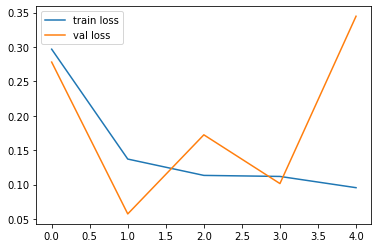

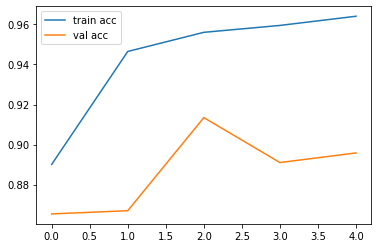

<Figure size 432x288 with 0 Axes>

In [14]:
# plot the loss
plt.plot(res.history['loss'], label='train loss')
#plt.plot(res.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(res.history['accuracy'], label='train acc')
plt.plot(res.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [27]:
model.save('Pneumonia_model_vgg19.h5')

In [3]:
model = load_model('Pneumonia_model_vgg19.h5')
img=image.load_img('chest_xray/train/NORMAL/NORMAL2-IM-0946-0001.jpeg',target_size=(224,224))
y=image.img_to_array(img)
y=np.expand_dims(y,axis=0)
img_data=preprocess_input(y)
out=model.predict(img_data)

In [4]:
print(out[0][0])#normal
print(out[0][1])#pneumonia

1.0
0.0
